# Polo's Workspace

## Introduction
The data set was donated to us by an unnamed company handling flight ticket reservations. The data is thin, it contains
<ul>
<li> the date of departure
<li> the departure airport
<li> the arrival airport
<li> the mean and standard deviation of the number of weeks of the reservations made before the departure date
<li> a field called <code>log_PAX</code> which is related to the number of passengers (the actual number were changed for privacy reasons)
</ul>

The goal is to predict the <code>log_PAX</code> column. The prediction quality is measured by RMSE. 

The data is obviously limited, but since data and location informations are available, it can be joined to external data sets. <b>The challenge in this RAMP is to find good data that can be correlated to flight traffic</b>.

In [1]:
%matplotlib inline
import imp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
import seaborn as sns; sns.set()

## We load the data and vizualize

In [2]:
problem = imp.load_source('', 'problem.py')
X_df, y_array = problem.get_train_data()

In [3]:
print('first date: ', min(X_df['DateOfDeparture']))
print('last date: ', max(X_df['DateOfDeparture']))

first date:  2011-09-01
last date:  2013-03-05


In [4]:
X_df.head(10)

,DateOfDeparture,Departure,Arrival,WeeksToDeparture,std_wtd
0,2012-06-19,ORD,DFW,12.875000,9.812647
1,2012-09-10,LAS,DEN,14.285714,9.466734
2,2012-10-05,DEN,LAX,10.863636,9.035883
3,2011-10-09,ATL,ORD,11.480000,7.990202
4,2012-02-21,DEN,SFO,11.450000,9.517159
5,2013-01-22,ATL,MCO,10.363636,8.232025
6,2011-10-20,SFO,LAS,15.266667,9.808277
7,2012-01-28,EWR,ORD,8.588235,6.165010
8,2012-05-27,ATL,CLT,10.238095,6.609877
9,2013-02-22,ATL,DEN,8.294118,5.542616


In [5]:
y_array[:10]

array([12.33129622, 10.77518151, 11.08317675, 11.16926784, 11.26936373,
       12.07364919, 11.17393612,  9.5999524 ,  9.17564514, 10.73431968])

{'whiskers': [<matplotlib.lines.Line2D at 0x104bc95f8>,
 'caps': [<matplotlib.lines.Line2D at 0x104bc9cf8>,
 'boxes': [<matplotlib.lines.Line2D at 0x104bc91d0>],
 'medians': [<matplotlib.lines.Line2D at 0x104bdb438>],
 'fliers': [<matplotlib.lines.Line2D at 0x104bdb7b8>],
 'means': []}

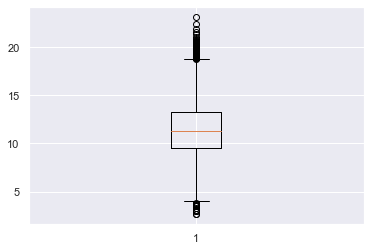

In [6]:
#Boxplot mean
plt.boxplot(X_df.iloc[:, 3])

{'whiskers': [<matplotlib.lines.Line2D at 0x104c0fef0>,
 'caps': [<matplotlib.lines.Line2D at 0x104c1d908>,
 'boxes': [<matplotlib.lines.Line2D at 0x104c0fd68>],
 'medians': [<matplotlib.lines.Line2D at 0x104c1dda0>],
 'fliers': [<matplotlib.lines.Line2D at 0x104c283c8>],
 'means': []}

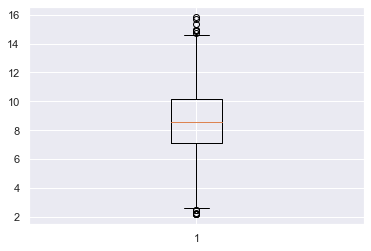

In [7]:
#Boxplot standard deviation
plt.boxplot(X_df.iloc[:, 4])

In [8]:
X_df.describe()

,WeeksToDeparture,std_wtd
count,8902.000000,8902.000000
mean,11.446469,8.617773
std,2.787140,2.139604
min,2.625000,2.160247
25%,9.523810,7.089538
50%,11.300000,8.571116
75%,13.240000,10.140521
max,23.163265,15.862216


In [9]:
X_df['Departure'].unique()

array(['ORD', 'LAS', 'DEN', 'ATL', 'SFO', 'EWR', 'IAH', 'LAX', 'DFW',
       'SEA', 'JFK', 'PHL', 'MIA', 'DTW', 'BOS', 'MSP', 'CLT', 'MCO',
       'PHX', 'LGA'], dtype=object)

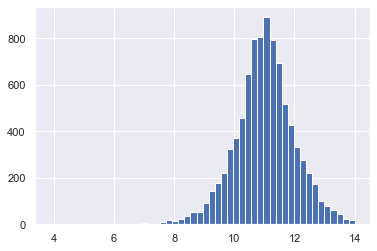

In [10]:
plt.hist(y_array, bins=50);

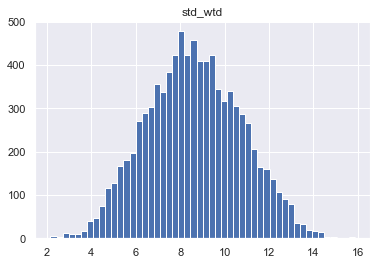

In [11]:
X_df.hist('std_wtd', bins=50);

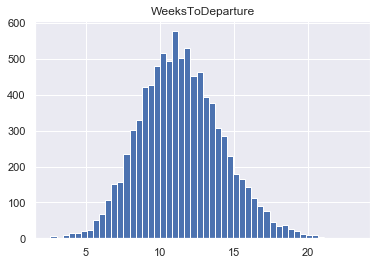

In [12]:
X_df.hist('WeeksToDeparture', bins=50);

In [13]:
print(y_array.mean())
print(y_array.std())

10.99904767212102
0.9938894125318564


## We download the external dataset

In [14]:
X_encoded = X_df
external_data = pd.read_csv('submissions/starting_kit/external_data.csv')
external_data = external_data.rename(
            columns={'Date': 'DateOfDeparture', 'AirPort': 'Arrival'})
X_encoded = pd.merge(
            X_encoded, external_data, how='left',
            left_on=['DateOfDeparture', 'Arrival'],
            right_on=['DateOfDeparture', 'Arrival'],
            sort=False)
X_encoded.head()

,DateOfDeparture,Departure,Arrival,WeeksToDeparture,std_wtd,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,Max Sea Level PressurehPa,Mean Sea Level PressurehPa,Min Sea Level PressurehPa,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
0,2012-06-19,ORD,DFW,12.875000,9.812647,34,29,24,22,21,19,82,63,44,1012,1010,1009,16,16,16,48,29,60.0,0.00,5,NaN,161
1,2012-09-10,LAS,DEN,14.285714,9.466734,33,25,16,-2,-6,-8,21,14,7,1011,1008,1005,16,16,16,35,15,42.0,0.00,3,NaN,207
2,2012-10-05,DEN,LAX,10.863636,9.035883,22,19,16,17,16,14,93,77,61,1018,1016,1014,16,13,8,24,8,29.0,0.00,5,Fog,266
3,2011-10-09,ATL,ORD,11.480000,7.990202,27,19,11,12,10,9,83,58,33,1028,1026,1024,16,16,16,23,6,29.0,0.00,1,NaN,93
4,2012-02-21,DEN,SFO,11.450000,9.517159,16,12,8,10,8,7,93,79,64,1027,1025,1024,16,12,3,24,8,29.0,0.00,7,NaN,300


## organization of the data set

In [15]:
#import pandas_profiling
#X_encoded.profile_report()

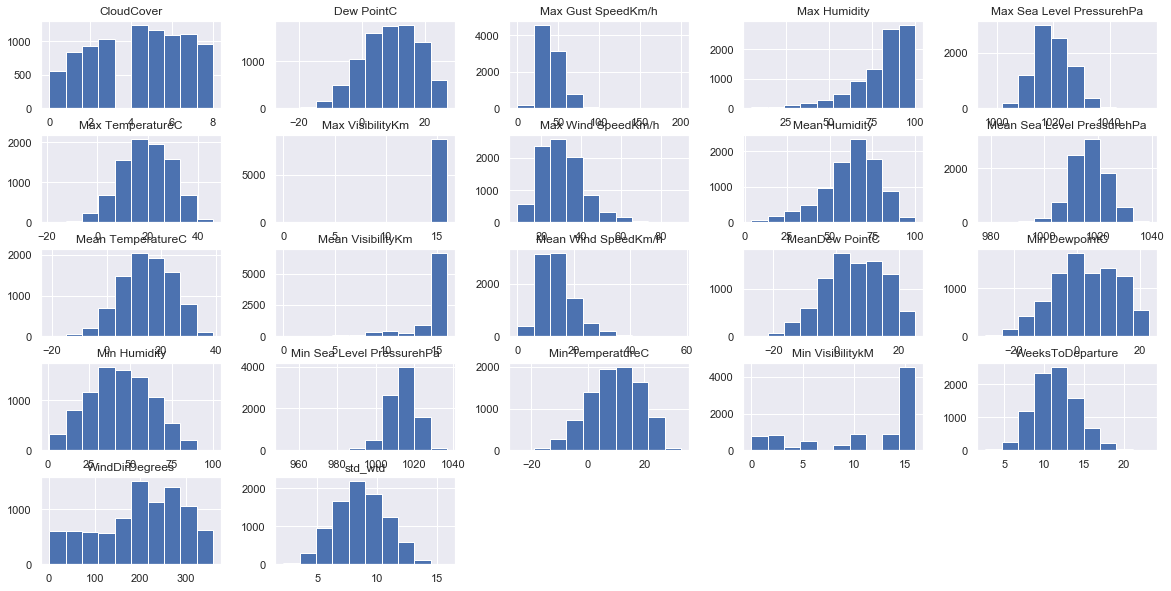

In [16]:
_ = X_encoded.hist(figsize=(20, 10))

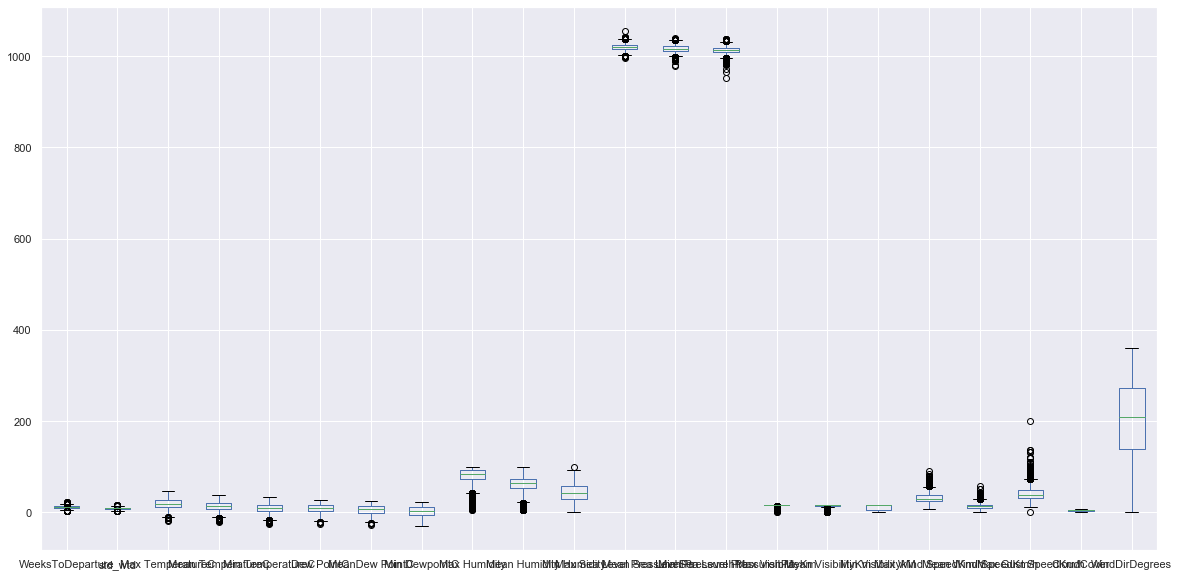

In [17]:
plt.subplots(figsize=(20, 10))
X_encoded.boxplot()

In [18]:
X_encoded = X_encoded.join(pd.get_dummies(X_encoded['Departure'], prefix='d'))
X_encoded = X_encoded.join(pd.get_dummies(X_encoded['Arrival'], prefix='a'))
X_encoded = X_encoded.drop('Departure', axis=1)
X_encoded = X_encoded.drop('Arrival', axis=1)

X_encoded['DateOfDeparture'] = pd.to_datetime(X_encoded['DateOfDeparture'])
X_encoded['year'] = X_encoded['DateOfDeparture'].dt.year
X_encoded['month'] = X_encoded['DateOfDeparture'].dt.month
X_encoded['day'] = X_encoded['DateOfDeparture'].dt.day
X_encoded['weekday'] = X_encoded['DateOfDeparture'].dt.weekday
X_encoded['week'] = X_encoded['DateOfDeparture'].dt.week
X_encoded['n_days'] = X_encoded['DateOfDeparture'].apply(lambda date: (date - pd.to_datetime("1970-01-01")).days)

X_encoded = X_encoded.join(pd.get_dummies(X_encoded['year'], prefix='y'))
X_encoded = X_encoded.join(pd.get_dummies(X_encoded['month'], prefix='m'))
X_encoded = X_encoded.join(pd.get_dummies(X_encoded['day'], prefix='d'))
X_encoded = X_encoded.join(pd.get_dummies(X_encoded['weekday'], prefix='wd'))
X_encoded = X_encoded.join(pd.get_dummies(X_encoded['week'], prefix='w'))

X_encoded = X_encoded.drop(['year', 'month', 'day', 'weekday', 'week', 'n_days'], axis=1)

X_encoded = X_encoded.drop('DateOfDeparture', axis=1)

In [19]:
X_encoded.head()

,WeeksToDeparture,std_wtd,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,Max Sea Level PressurehPa,Mean Sea Level PressurehPa,Min Sea Level PressurehPa,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees,d_ATL,d_BOS,d_CLT,d_DEN,d_DFW,d_DTW,d_EWR,d_IAH,d_JFK,d_LAS,d_LAX,d_LGA,d_MCO,d_MIA,d_MSP,d_ORD,d_PHL,d_PHX,d_SEA,d_SFO,a_ATL,a_BOS,a_CLT,a_DEN,a_DFW,a_DTW,a_EWR,a_IAH,a_JFK,a_LAS,a_LAX,a_LGA,a_MCO,a_MIA,a_MSP,a_ORD,a_PHL,a_PHX,a_SEA,a_SFO,y_2011,y_2012,y_2013,m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10,m_11,m_12,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,wd_0,wd_1,wd_2,wd_3,wd_4,wd_5,wd_6,w_1,w_2,w_3,w_4,w_5,w_6,w_7,w_8,w_9,w_10,w_11,w_12,w_13,w_14,w_15,w_16,w_17,w_18,w_19,w_20,w_21,w_22,w_23,w_24,w_25,w_26,w_27,w_28,w_29,w_30,w_31,w_32,w_33,w_34,w_35,w_36,w_37,w_38,w_39,w_40,w_41,w_42,w_43,w_44,w_45,w_46,w_47,w_48,w_49,w_50,w_51,w_52
0,12.875000,9.812647,34,29,24,22,21,19,82,63,44,1012,1010,1009,16,16,16,48,29,60.0,0.00,5,NaN,161,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,14.285714,9.466734,33,25,16,-2,-6,-8,21,14,7,1011,1008,1005,16,16,16,35,15,42.0,0.00,3,NaN,207,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,10.863636,9.035883,22,19,16,17,16,14,93,77,61,1018,1016,1014,16,13,8,24,8,29.0,0.00,5,Fog,266,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,11.480000,7.990202,27,19,11,12,10,9,83,58,33,1028,1026,1024,16,16,16,23,6,29.0,0.00,1,NaN,93,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,11.450000,9.517159,16,12,8,10,8,7,93,79,64,1027,1025,1024,16,12,3,24,8,29.0,0.00,7,NaN,300,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
#from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
#from sklearn.compose import ColumnTransformer
#from sklearn.pipeline import make_pipeline


scaler = StandardScaler()
data_scaled = scaler.fit_transform(X_encoded.loc[:, 'Max TemperatureC': 'CloudCover'])
#data_scaled = pd.DataFrame(data_scaled, columns=('Max TemperatureC', 'Mean TemperatureC', 'Min TemperatureC', 'MeanDew PointC', 'Mean Humidity', 'Mean VisibilityKm', 'CloudCover'))
data_scaled.head()

ValueError: could not convert string to float: 'T'

In [ ]:
import pandas as pd
import os
from sklearn.preprocessing import OneHotEncoder


class FeatureExtractor(object):
    def __init__(self):
        pass

    def fit(self, X_df, y_array):
        pass

    def transform(self, X_df):
        X_encoded = X_df
        path = os.path.dirname(__file__)
        data_weather = pd.read_csv(os.path.join(path, 'external_data.csv'))
        X_weather = data_weather[['Date', 'AirPort', 'Max TemperatureC', 'Mean TemperatureC', 'Min TemperatureC'
                                 'MeanDew PointC', 'Mean Humidity', 'Mean VisibilityKm', 'CloudCover']]
        X_weather = X_weather.rename(
            columns={'Date': 'DateOfDeparture', 'AirPort': 'Arrival'})
        X_encoded = pd.merge(
            X_encoded, X_weather, how='left',
            left_on=['DateOfDeparture', 'Arrival'],
            right_on=['DateOfDeparture', 'Arrival'],
            sort=False)

        X_encoded = X_encoded.join(pd.get_dummies(X_encoded['Departure'], prefix='d'))
        X_encoded = X_encoded.join(pd.get_dummies(X_encoded['Arrival'], prefix='a'))
        X_encoded = X_encoded.drop('Departure', axis=1)
        X_encoded = X_encoded.drop('Arrival', axis=1)

        X_encoded['DateOfDeparture'] = pd.to_datetime(X_encoded['DateOfDeparture'])
        X_encoded['year'] = X_encoded['DateOfDeparture'].dt.year
        X_encoded['month'] = X_encoded['DateOfDeparture'].dt.month
        X_encoded['day'] = X_encoded['DateOfDeparture'].dt.day
        X_encoded['weekday'] = X_encoded['DateOfDeparture'].dt.weekday
        X_encoded['week'] = X_encoded['DateOfDeparture'].dt.week
        X_encoded['n_days'] = X_encoded['DateOfDeparture'].apply(lambda date: (date - pd.to_datetime("1970-01-01")).days)

        X_encoded = X_encoded.join(pd.get_dummies(X_encoded['year'], prefix='y'))
        X_encoded = X_encoded.join(pd.get_dummies(X_encoded['month'], prefix='m'))
        X_encoded = X_encoded.join(pd.get_dummies(X_encoded['day'], prefix='d'))
        X_encoded = X_encoded.join(pd.get_dummies(X_encoded['weekday'], prefix='wd'))
        X_encoded = X_encoded.join(pd.get_dummies(X_encoded['week'], prefix='w'))

        X_encoded = X_encoded.drop(['year', 'month', 'day', 'weekday', 'week', 'n_days'], axis=1)

        X_encoded = X_encoded.drop('DateOfDeparture', axis=1)
        
        X_array = X_encoded.values
        return X_array